In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

script_dir = os.path.abspath("")
mymodule_dir = os.path.join(script_dir, "..", "scripts")
sys.path.append(mymodule_dir)
import cleaning

pd.set_option("mode.copy_on_write", True)
sns.set_theme()
sns.set_style("white")
%config InlineBackend.figure_format = "retina"

stats = pd.read_pickle("../data/statistics.pkl")

# stats.head()

In [2]:
def format_stats(_df):
    return (
        _df.assign(
            **{
                "junior+data+scientist": (
                    lambda x: x["junior+data+scientist"].astype("Int64")
                ),
                "junior+data+science": (
                    lambda x: x["junior+data+science"].astype("Int64")
                ),
                "junior+data+analyst": (
                    lambda x: x["junior+data+analyst"].astype("Int64")
                ),
                "junior+data+analysis": (
                    lambda x: x["junior+data+analysis"].astype("Int64")
                ),
                "Date": lambda x: pd.to_datetime(x["Date"], format="%d.%m.%Y"),
            }
        )
        .groupby("Date")
        .sum()
        .assign(
            Summe=lambda x: x[
                [
                    "junior+data+scientist",
                    "junior+data+science",
                    "junior+data+analyst",
                    "junior+data+analysis",
                ]
            ].sum(axis=1),
            **{"Kumulative Summe": (lambda x: x["Summe"].cumsum())},
        )
        .loc[:, ["Summe", "Kumulative Summe"]]
    )


formatted_stats = format_stats(stats)
formatted_stats.tail()

,Summe,Kumulative Summe
Date,,
2024-03-10,13,13912
2024-03-15,125,14037
2024-03-16,1,14038
2024-03-17,0,14038
2024-03-18,0,14038


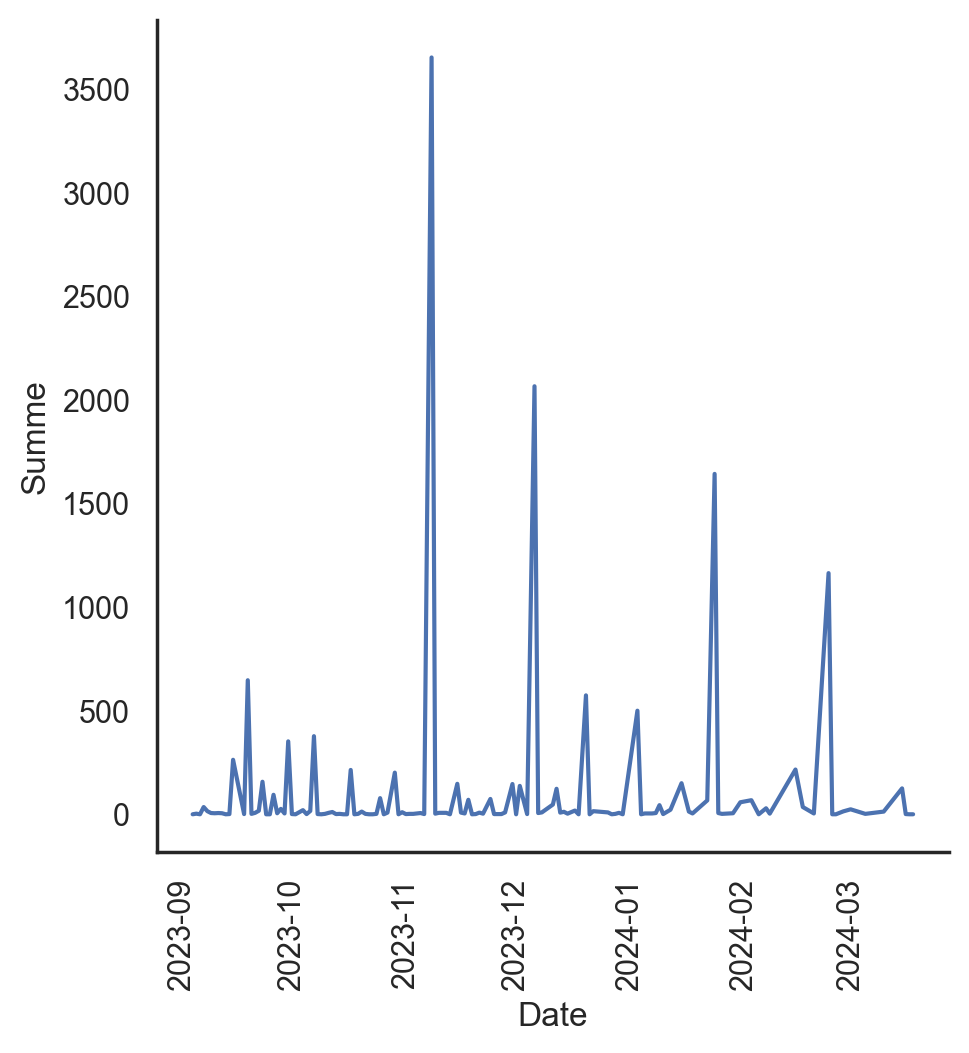

In [3]:
g = sns.relplot(data=formatted_stats, x="Date", y="Summe", kind="line")
plt.xticks(rotation=90)
g.set(ylabel="Summe")
plt.show()

,Summe
Datum,
2024-03-01,9
2024-03-05,1
2024-03-10,10
2024-03-15,78
2024-03-16,1


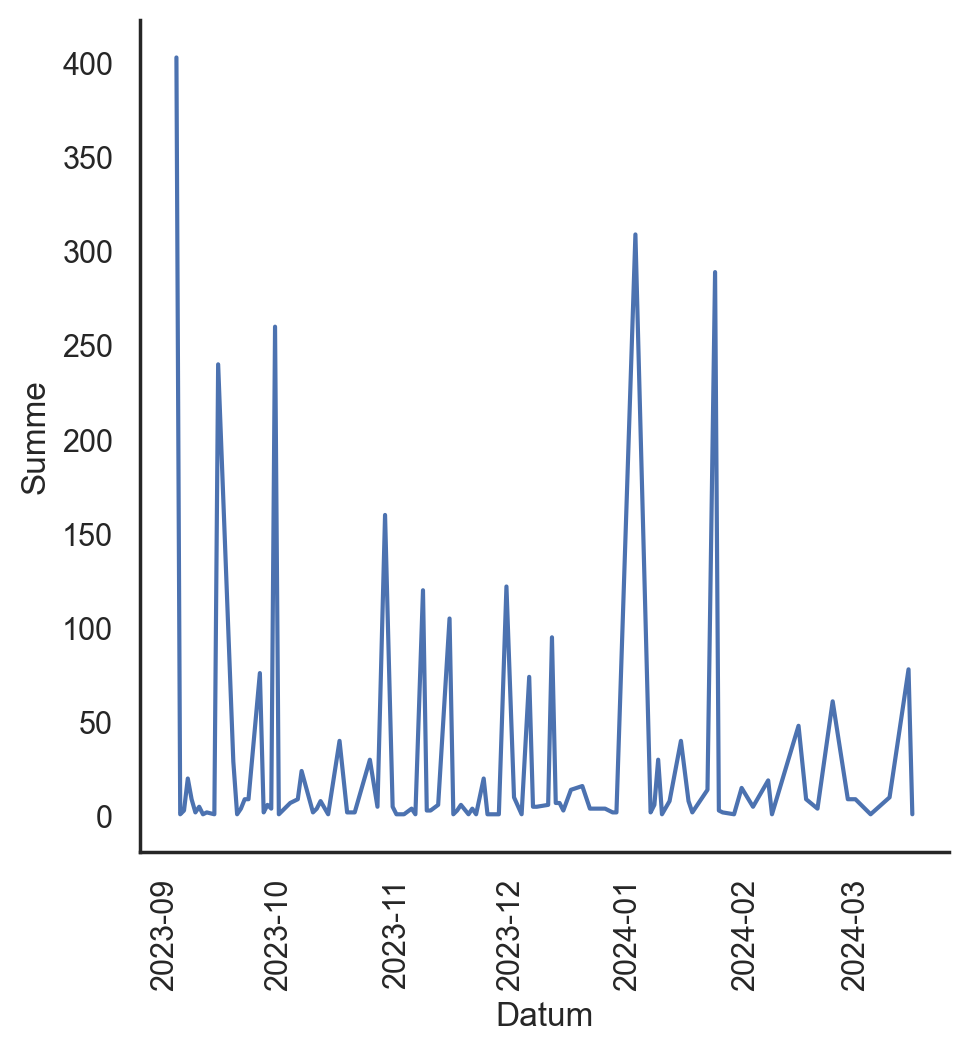

In [4]:
relevant_jobs_stats = pd.DataFrame(
    cleaning.prep(pd.read_pickle("../data/jobs.pkl")).groupby("Datum").size()
).rename(columns={0: "Summe"})

display(relevant_jobs_stats.tail())

g = sns.relplot(data=relevant_jobs_stats, x="Datum", y="Summe", kind="line")
plt.xticks(rotation=90)
g.set(ylabel="Summe")
plt.show()